# **Online Retailer Sales Analysis Project**


---



# Content

1. Overview
2. Exploratory Data Analysis (EDA)
3. Data Wrangling
4. Feature Engineering
5. Data Analysis
6. Time Series Analysis
7. Time Series Forecast



---



# Overview

- This dataset "Online Retailer Sales" is downloaded from Kaggle website. </br>
https://www.kaggle.com/datasets/thedevastator/online-retail-sales-and-customer-data
- The dataset is in tabular format(.csv file) of 9 columns and 541909 entries. It contains entries for invoices for each customer with the corresponding timestamp, geographical location, product, quantity and price.
- Columns are: index, InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country      


In [110]:
# importing libraries and modules

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from datetime import datetime

from prophet import Prophet
from sklearn.linear_model import LinearRegression
import xgboost as xgb

from scipy.interpolate import make_interp_spline
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [5]:
# plotting styling
plt.style.use('fivethirtyeight')
color_palette = sns.color_palette()
plt.rcParams['figure.figsize'] = (15,3)
%matplotlib inline


In [6]:
# read data into dataframe
df = pd.read_csv('/content/online_retail.csv')


◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼

# Exploratory Data Analysis (EDA)

In [7]:
df.head()


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [9]:
df.shape


(541909, 9)

In [10]:
# display nulls per column
df.isnull().sum()


,0
index,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


## Index Column

In [11]:
# checking duplicates in index column
pd.Series(df['index'].unique()).count(), df.shape


(541909, (541909, 9))

## InvoiceNo Column

In [12]:
# InvoiceNo value counts
df['InvoiceNo'].value_counts()


,count
InvoiceNo,
573585,1114
581219,749
581492,731
580729,721
558475,705
...,...
554023,1
554022,1
554021,1


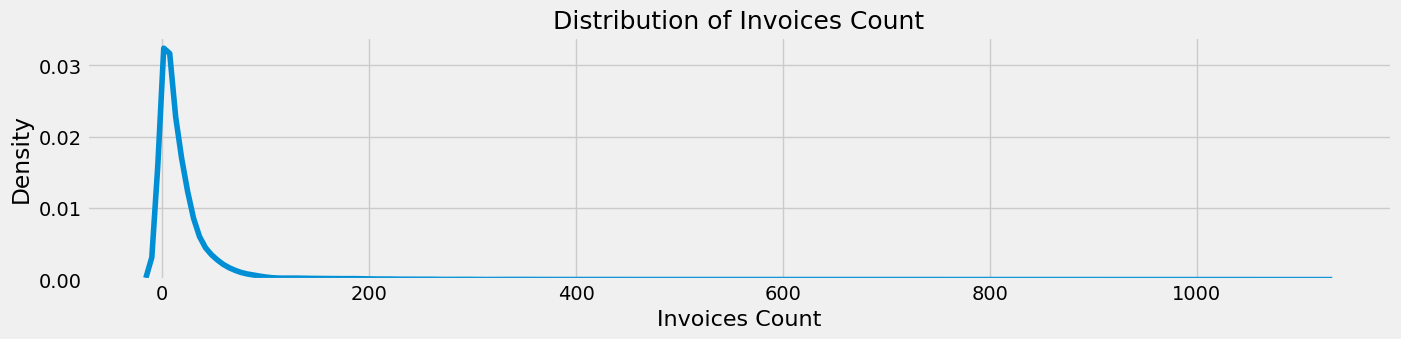

In [13]:
# distribution of invoices count
invoice = pd.DataFrame(df['InvoiceNo'].value_counts())
sns.kdeplot(invoice['count'])
plt.title('Distribution of Invoices Count', fontsize = 18)
plt.xlabel('Invoices Count', fontsize = 16)
plt.show()


## StockCode Column

In [14]:
# StockCode value counts
df['StockCode'].value_counts()


,count
StockCode,
85123A,2313
22423,2203
85099B,2159
47566,1727
20725,1639
...,...
21431,1
22275,1
17001,1


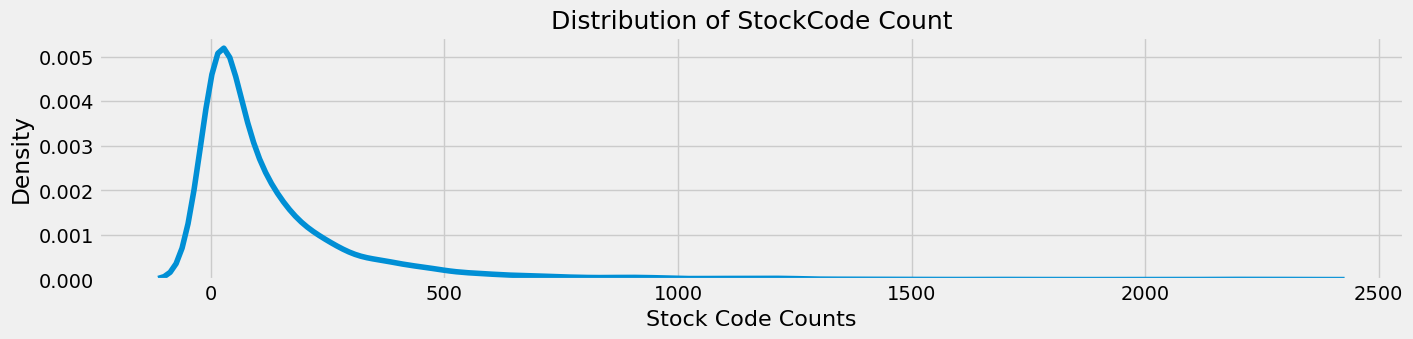

In [15]:
# distribution of invoices count
stockcode = pd.DataFrame(df['StockCode'].value_counts())
sns.kdeplot(stockcode['count'])
plt.title('Distribution of StockCode Count', fontsize = 18)
plt.xlabel('Stock Code Counts', fontsize = 16)
plt.show()


## Description Column

In [16]:
# display nulls in description col
df[df['Description'].isnull()]


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...,...
535322,535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


## Quantity Column

In [17]:
df['Quantity'].describe()


,Quantity
count,541909.000000
mean,9.552250
std,218.081158
min,-80995.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,80995.000000


In [18]:
# display some negative values in Quantity col
df[df['Quantity'] < 0].head()


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom


In [19]:
# display the most negative values in Quantity col
df.sort_values(by = ['Quantity']).head()


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446.0,United Kingdom
61624,61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom
225529,225529,556690,23005,printing smudges/thrown away,-9600,6/14/2011 10:37,0.00,NaN,United Kingdom
225530,225530,556691,23005,printing smudges/thrown away,-9600,6/14/2011 10:37,0.00,NaN,United Kingdom
4287,4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,15838.0,United Kingdom


In [20]:
# count of positive and negative values in Quantity Column

pos_values = 0
neg_values = 0

for i in df['Quantity']:
  if i > 0:
    pos_values += 1
  else:
    neg_values += 1

print(f'Quantity Positive Count: {pos_values}\nNegative Quantity Count: {neg_values}')


Quantity Positive Count: 531285
Negative Quantity Count: 10624


In [21]:
# display maximum and minimum values in Quantity col
max_quantity = df['Quantity'].max()
min_quantity = df['Quantity'].min()
df.query('Quantity == @max_quantity | Quantity == @min_quantity')       # it seems to be some product return process


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom
540422,540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446.0,United Kingdom


## InvoiceDate Column

In [22]:
# display start and end timestamps (not yet has datetime data type)
df.InvoiceDate.unique()


array(['12/1/2010 8:26', '12/1/2010 8:28', '12/1/2010 8:34', ...,
       '12/9/2011 12:31', '12/9/2011 12:49', '12/9/2011 12:50'],
      dtype=object)

## UnitPrice Column

In [23]:
df['UnitPrice'].describe()


,UnitPrice
count,541909.000000
mean,4.611114
std,96.759853
min,-11062.060000
25%,1.250000
50%,2.080000
75%,4.130000
max,38970.000000


In [24]:
# display negative values in UnitPrice col
df.sort_values(by = ['UnitPrice']).head()         # negative big values of UnitPrice col are debts


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299984,299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom
299983,299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
40984,40984,539750,22652,TRAVEL SEWING KIT,1,12/21/2010 15:40,0.00,NaN,United Kingdom
52217,52217,540696,84562A,NaN,1,1/11/2011 9:14,0.00,NaN,United Kingdom
52262,52262,540699,POST,NaN,1000,1/11/2011 9:32,0.00,NaN,United Kingdom


## CustomerID Column

In [25]:
# display value counts in CustomerID col
df['CustomerID'].value_counts()


,count
CustomerID,
17841.0,7983
14911.0,5903
14096.0,5128
12748.0,4642
14606.0,2782
...,...
15070.0,1
15753.0,1
17065.0,1


In [26]:
# count nulls in CustomerID col
df['CustomerID'].isnull().sum()


135080

In [27]:
# display some nulls in CustomerID col
df[df['CustomerID'].isnull()].head()


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


## Country Column

In [28]:
# display value counts in Country col
df['Country'].value_counts()


,count
Country,
United Kingdom,495478
Germany,9495
France,8557
EIRE,8196
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,2002
Portugal,1519


◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼

# Data Wrangling

## Rename Some Columns

In [29]:
df = df.rename(columns = {'UnitPrice': 'UnitPrice_GBP'})


## Duplicates

In [30]:
print(df.shape)
df = df.drop_duplicates()
df.shape


(541909, 9)


(541909, 9)

## index Column

In [31]:
df = df.drop(columns = ['index'])


## Description Column

In [32]:
# fill null values in description column with unknown
df['Description'] = df['Description'].fillna('UNKNOWN')


## CustomerID Column

In [33]:
df['CustomerID'].isnull().sum()


135080

In [34]:
df['CustomerID'].dtype


dtype('float64')

In [35]:
df['CustomerID'] = df['CustomerID'].fillna(0)


In [36]:
# convert CustomerID column datatype to string
df = df.astype({'CustomerID': 'int'})
df = df.astype({'CustomerID': 'str'})


In [37]:
df[df['CustomerID'] == '0'].head(5)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice_GBP,CustomerID,Country
622,536414,22139,UNKNOWN,56,12/1/2010 11:52,0.00,0,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,0,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,0,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,0,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,0,United Kingdom


In [38]:
# generating CustomerID for unknown customers using InvoiceNo
df = df.replace({'CustomerID': {'0': 'A' + df['InvoiceNo']}})


In [39]:
df.iloc[[622,1443,1444, 1445, 1446],:]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice_GBP,CustomerID,Country
622,536414,22139,UNKNOWN,56,12/1/2010 11:52,0.00,A536414,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,A536544,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,A536544,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,A536544,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,A536544,United Kingdom


## InvoiceDate Column

In [40]:
df['InvoiceDate'].head(1)


,InvoiceDate
0,12/1/2010 8:26


In [41]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head(1)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice_GBP,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom


In [42]:
df['InvoiceDate'].dt.year.value_counts()


,count
InvoiceDate,
2011,499428
2010,42481


In [43]:
# choosing only year 2011
print(df.shape)
df = df[df['InvoiceDate'].dt.year == 2011]
df.shape


(541909, 8)


(499428, 8)

## Country Column

In [44]:
countries = pd.DataFrame(df['Country'].value_counts()).reset_index()
countries = countries.rename(columns = {'count': 'CountofCountryRecords'})
countries


,Country,CountofCountryRecords
0,United Kingdom,455353
1,Germany,8930
2,France,8118
3,EIRE,7793
4,Spain,2458
5,Netherlands,2299
6,Belgium,1974
7,Switzerland,1953
8,Portugal,1399
9,Australia,1224


In [45]:
countries = countries[countries['CountofCountryRecords'] < 500]
df['Country'] = df['Country'].apply(
    lambda x: 'Other' if x in list(countries['Country']) else x
)
df['Country'].value_counts()


,count
Country,
United Kingdom,455353
Germany,8930
France,8118
EIRE,7793
Other,4268
Spain,2458
Netherlands,2299
Belgium,1974
Switzerland,1953


## Remove Outliers

In [46]:
df[df['Description'].str.contains('debt') == True]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice_GBP,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,AA563185,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,AA563186,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,AA563187,United Kingdom


In [47]:
# removing bad debts to perform sales analysis
df = df[~(df['Description'].str.contains('debt') == True)]


◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼

# Feature Engineering

## Price_GBP Column

In [48]:
df['Price_GBP'] = df['Quantity'] * df['UnitPrice_GBP']
df.head()


<ipython-input-48-365630ba61f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price_GBP'] = df['Quantity'] * df['UnitPrice_GBP']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice_GBP,CustomerID,Country,Price_GBP
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313,United Kingdom,19.5
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,10.5
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,10.5
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313,United Kingdom,10.5
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313,United Kingdom,12.5


## Decomposition of InvoiceDate Column

In [49]:
df['Quarter']   = df['InvoiceDate'].dt.quarter
df['Month']     = df['InvoiceDate'].dt.month
df['MonthName'] = df['InvoiceDate'].dt.month_name()
df['DayName']   = df['InvoiceDate'].dt.day_name()
df['Day']       = df['InvoiceDate'].dt.day
df['Hour']      = df['InvoiceDate'].dt.hour
df['Minute']    = df['InvoiceDate'].dt.minute

df.sample(1)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice_GBP,CustomerID,Country,Price_GBP,Quarter,Month,MonthName,DayName,Day,Hour,Minute
415207,572520,23434,3 RAFFIA RIBBONS 50'S CHRISTMAS,10,2011-10-24 15:05:00,0.79,13165,United Kingdom,7.9,4,10,October,Monday,24,15,5


In [50]:
df[(df['Month'] == 5) & (df['Price_GBP'] < 0)].sort_values(by = ['Price_GBP'])


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice_GBP,CustomerID,Country,Price_GBP,Quarter,Month,MonthName,DayName,Day,Hour,Minute
173277,C551685,POST,POSTAGE,-1,2011-05-03 12:51:00,8142.75,16029,United Kingdom,-8142.75,2,5,May,Tuesday,3,12,51
191386,C553355,AMAZONFEE,AMAZON FEE,-1,2011-05-16 13:58:00,7006.83,AC553355,United Kingdom,-7006.83,2,5,May,Monday,16,13,58
173391,C551699,M,Manual,-1,2011-05-03 14:12:00,6930.00,16029,United Kingdom,-6930.00,2,5,May,Tuesday,3,14,12
191385,C553354,AMAZONFEE,AMAZON FEE,-1,2011-05-16 13:54:00,5876.40,AC553354,United Kingdom,-5876.40,2,5,May,Monday,16,13,54
200744,C554154,M,Manual,-1,2011-05-23 11:24:00,1241.98,12757,Portugal,-1241.98,2,5,May,Monday,23,11,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199715,C554100,21802,CHRISTMAS TREE HEART DECORATION,-1,2011-05-22 13:27:00,0.42,15555,United Kingdom,-0.42,2,5,May,Sunday,22,13,27
196506,C553854,21703,BAG 125g SWIRLY MARBLES,-1,2011-05-19 13:13:00,0.42,AC553854,United Kingdom,-0.42,2,5,May,Thursday,19,13,13
193139,C553512,22997,TRAVEL CARD WALLET UNION JACK,-1,2011-05-17 13:50:00,0.42,15005,United Kingdom,-0.42,2,5,May,Tuesday,17,13,50
172685,C551551,M,Manual,-1,2011-05-03 10:08:00,0.29,17841,United Kingdom,-0.29,2,5,May,Tuesday,3,10,8


In [51]:
df['Description'].value_counts()


,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2128
JUMBO BAG RED RETROSPOT,2034
REGENCY CAKESTAND 3 TIER,2009
PARTY BUNTING,1679
LUNCH BAG RED RETROSPOT,1549
...,...
PALE PINK/AMETHYST STONE NECKLACE,1
wrong code,1
SET 12 COLOURING PENCILS DOILEY,1


In [52]:
df = df.reset_index(drop = True)
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice_GBP,CustomerID,Country,Price_GBP,Quarter,Month,MonthName,DayName,Day,Hour,Minute
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313,United Kingdom,19.50,1,1,January,Tuesday,4,10,0
1,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,10.50,1,1,January,Tuesday,4,10,0
2,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,10.50,1,1,January,Tuesday,4,10,0
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313,United Kingdom,10.50,1,1,January,Tuesday,4,10,0
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313,United Kingdom,12.50,1,1,January,Tuesday,4,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499420,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,4,12,December,Friday,9,12,50
499421,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,4,12,December,Friday,9,12,50
499422,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,4,12,December,Friday,9,12,50
499423,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,4,12,December,Friday,9,12,50


◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼

# Data Analysis

## Geographical Analysis

In [53]:
sales_per_country = pd.DataFrame(df.groupby('Country')['Price_GBP'].sum()).reset_index()
sales_per_country = sales_per_country.sort_values(by = ['Price_GBP'], ascending = False)
sales_per_country


,Country,Price_GBP
15,United Kingdom,7522125.804
9,Netherlands,275877.060
4,EIRE,254246.870
7,Germany,207135.370
6,France,187828.540
11,Other,152483.410
0,Australia,136072.170
14,Switzerland,55080.430
13,Spain,52930.850
1,Belgium,39101.050


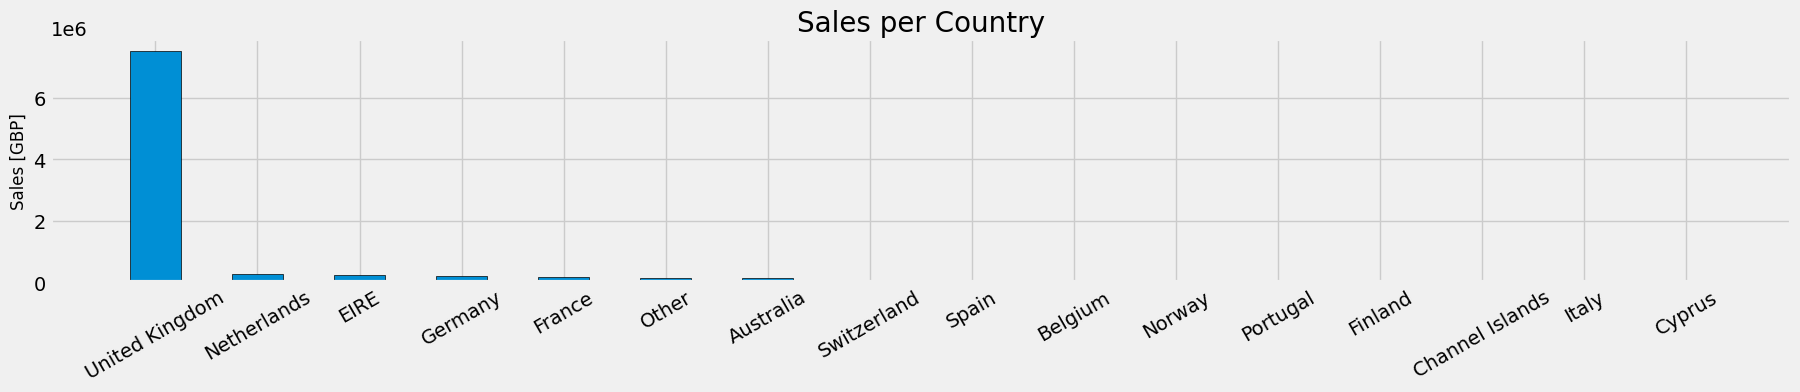

In [54]:
# sales by each country viz
plt.figure(figsize = (20,3))
plt.bar(sales_per_country['Country'], sales_per_country['Price_GBP'], width = 0.5, edgecolor = 'k')
plt.xticks(rotation = 30)
plt.ylabel('Sales [GBP]', fontsize = 12)
plt.title('Sales per Country', fontsize = 20)
plt.show()


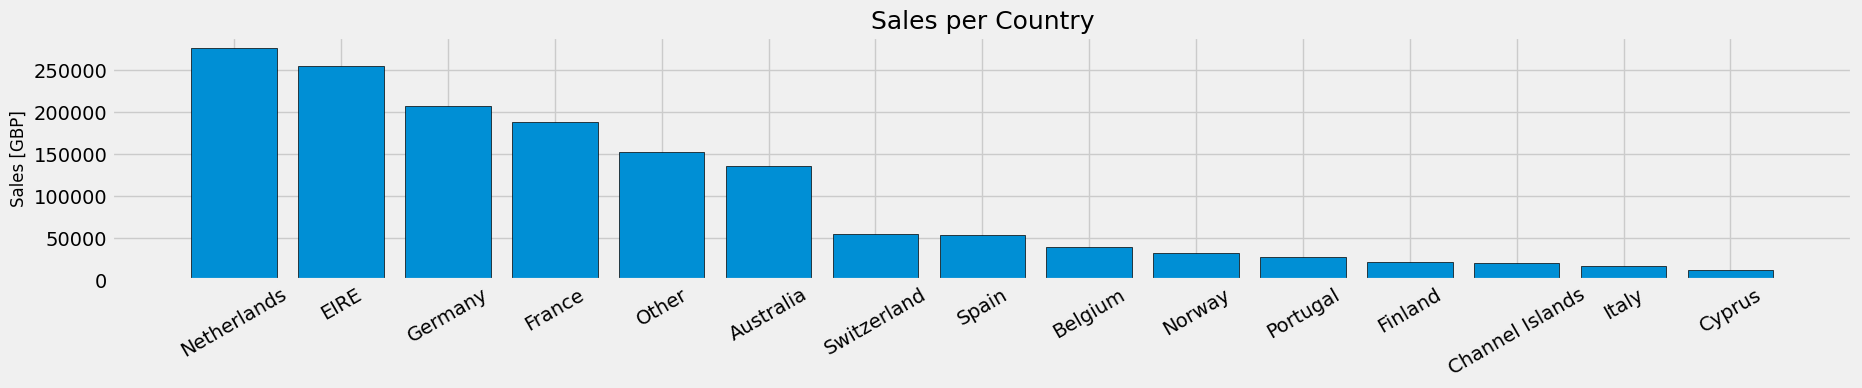

In [55]:
# total sales per country (exclude United Kingdom from graph to comparine other countries)
plt.figure(figsize = (20,3))
plt.bar(sales_per_country['Country'].drop([15]), sales_per_country['Price_GBP'].drop([15]), edgecolor = 'k')
plt.xticks(rotation = 30)
plt.ylabel('Sales [GBP]', fontsize = 12)
plt.title('Sales per Country', fontsize = 18)
plt.show()


In [56]:
# sales v country v month
sales_country_month = df.groupby(['Month', 'Country'])[['Price_GBP']].sum().reset_index()
sales_country_month


,Month,Country,Price_GBP
0,1,Australia,9017.71
1,1,Belgium,1154.05
2,1,Channel Islands,645.08
3,1,Cyprus,547.50
4,1,EIRE,21656.52
...,...,...,...
177,12,Norway,2785.70
178,12,Other,2225.45
179,12,Portugal,2801.95
180,12,Spain,271.43


In [57]:
# sales v country v month

sales_country_month_flat = pd.pivot_table(sales_country_month, index = 'Month', columns = 'Country', values = 'Price_GBP')
sales_country_month_flat = sales_country_month_flat.reset_index()

month_list  = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sales_country_month_flat.index = pd.CategoricalIndex(sales_country_month_flat['Month'], categories = month_list, ordered = True)

sales_country_month_flat = sales_country_month_flat.sort_index().reset_index(drop = True)
sales_country_month_flat = sales_country_month_flat.set_index('Month')
sales_country_month_flat


Country,Australia,Belgium,Channel Islands,Cyprus,EIRE,Finland,France,Germany,Italy,Netherlands,Norway,Other,Portugal,Spain,Switzerland,United Kingdom
Month,,,,,,,,,,,,,,,,
1,9017.71,1154.05,645.08,547.50,21656.52,889.02,17503.07,16451.43,2361.36,26611.16,NaN,13447.18,3998.11,7178.54,4231.23,434308.300
2,14627.47,2161.32,1784.71,4013.55,9674.14,205.16,8438.91,8969.24,251.50,22932.11,630.90,10175.46,1213.90,2093.70,2642.67,408247.910
3,17055.29,3333.58,3509.33,938.39,18783.23,5924.62,14516.90,14170.02,1778.91,22416.49,304.68,10970.52,2660.85,5326.65,1870.23,559707.390
4,333.40,1954.15,293.00,-35.80,7570.50,1626.81,4195.21,11963.37,737.83,2976.56,NaN,14042.46,1687.75,1785.65,1822.19,442254.041
5,13628.51,2727.00,903.79,NaN,17921.35,NaN,17527.08,25571.35,587.45,29185.88,NaN,11408.60,587.83,3257.60,3567.21,596459.860
6,25164.77,4273.17,2060.03,1109.32,20060.25,329.56,15991.87,13081.02,162.27,26843.09,5886.86,9588.41,879.51,3332.44,7882.20,554478.350
7,4767.57,2473.62,NaN,NaN,42740.65,2996.73,9888.99,15721.66,147.10,26.02,890.07,22525.23,2287.85,7578.17,3776.61,565479.841
8,22489.20,3536.12,4892.53,NaN,12157.47,1371.55,13789.26,19023.65,1934.80,39655.81,1984.46,13296.16,1206.40,3330.41,4882.19,550192.560
9,5031.73,4197.82,1321.65,196.35,42639.05,1105.45,23198.87,17720.31,279.80,26937.26,8678.94,11510.32,1433.22,5163.74,8254.96,862018.152


In [58]:
# sales v month v country viz
px.line(
    sales_country_month_flat,
    x = sales_country_month_flat.index,
    y = [i for i in sales_country_month_flat.columns],
    labels = {'value': 'Total Sales [GBP]'},
    title = 'sales v month v country'
    )


In [59]:
# sales v month v country (excluding UK)

sales_month_country_exc_uk = sales_country_month_flat.copy().drop(columns = ['United Kingdom'])

px.line(
    sales_month_country_exc_uk,
    x = sales_month_country_exc_uk.index,
    y = [i for i in sales_month_country_exc_uk.columns],
    labels = {'value': 'Total Sales [GBP]'},
    title = 'sales v month v country'
)


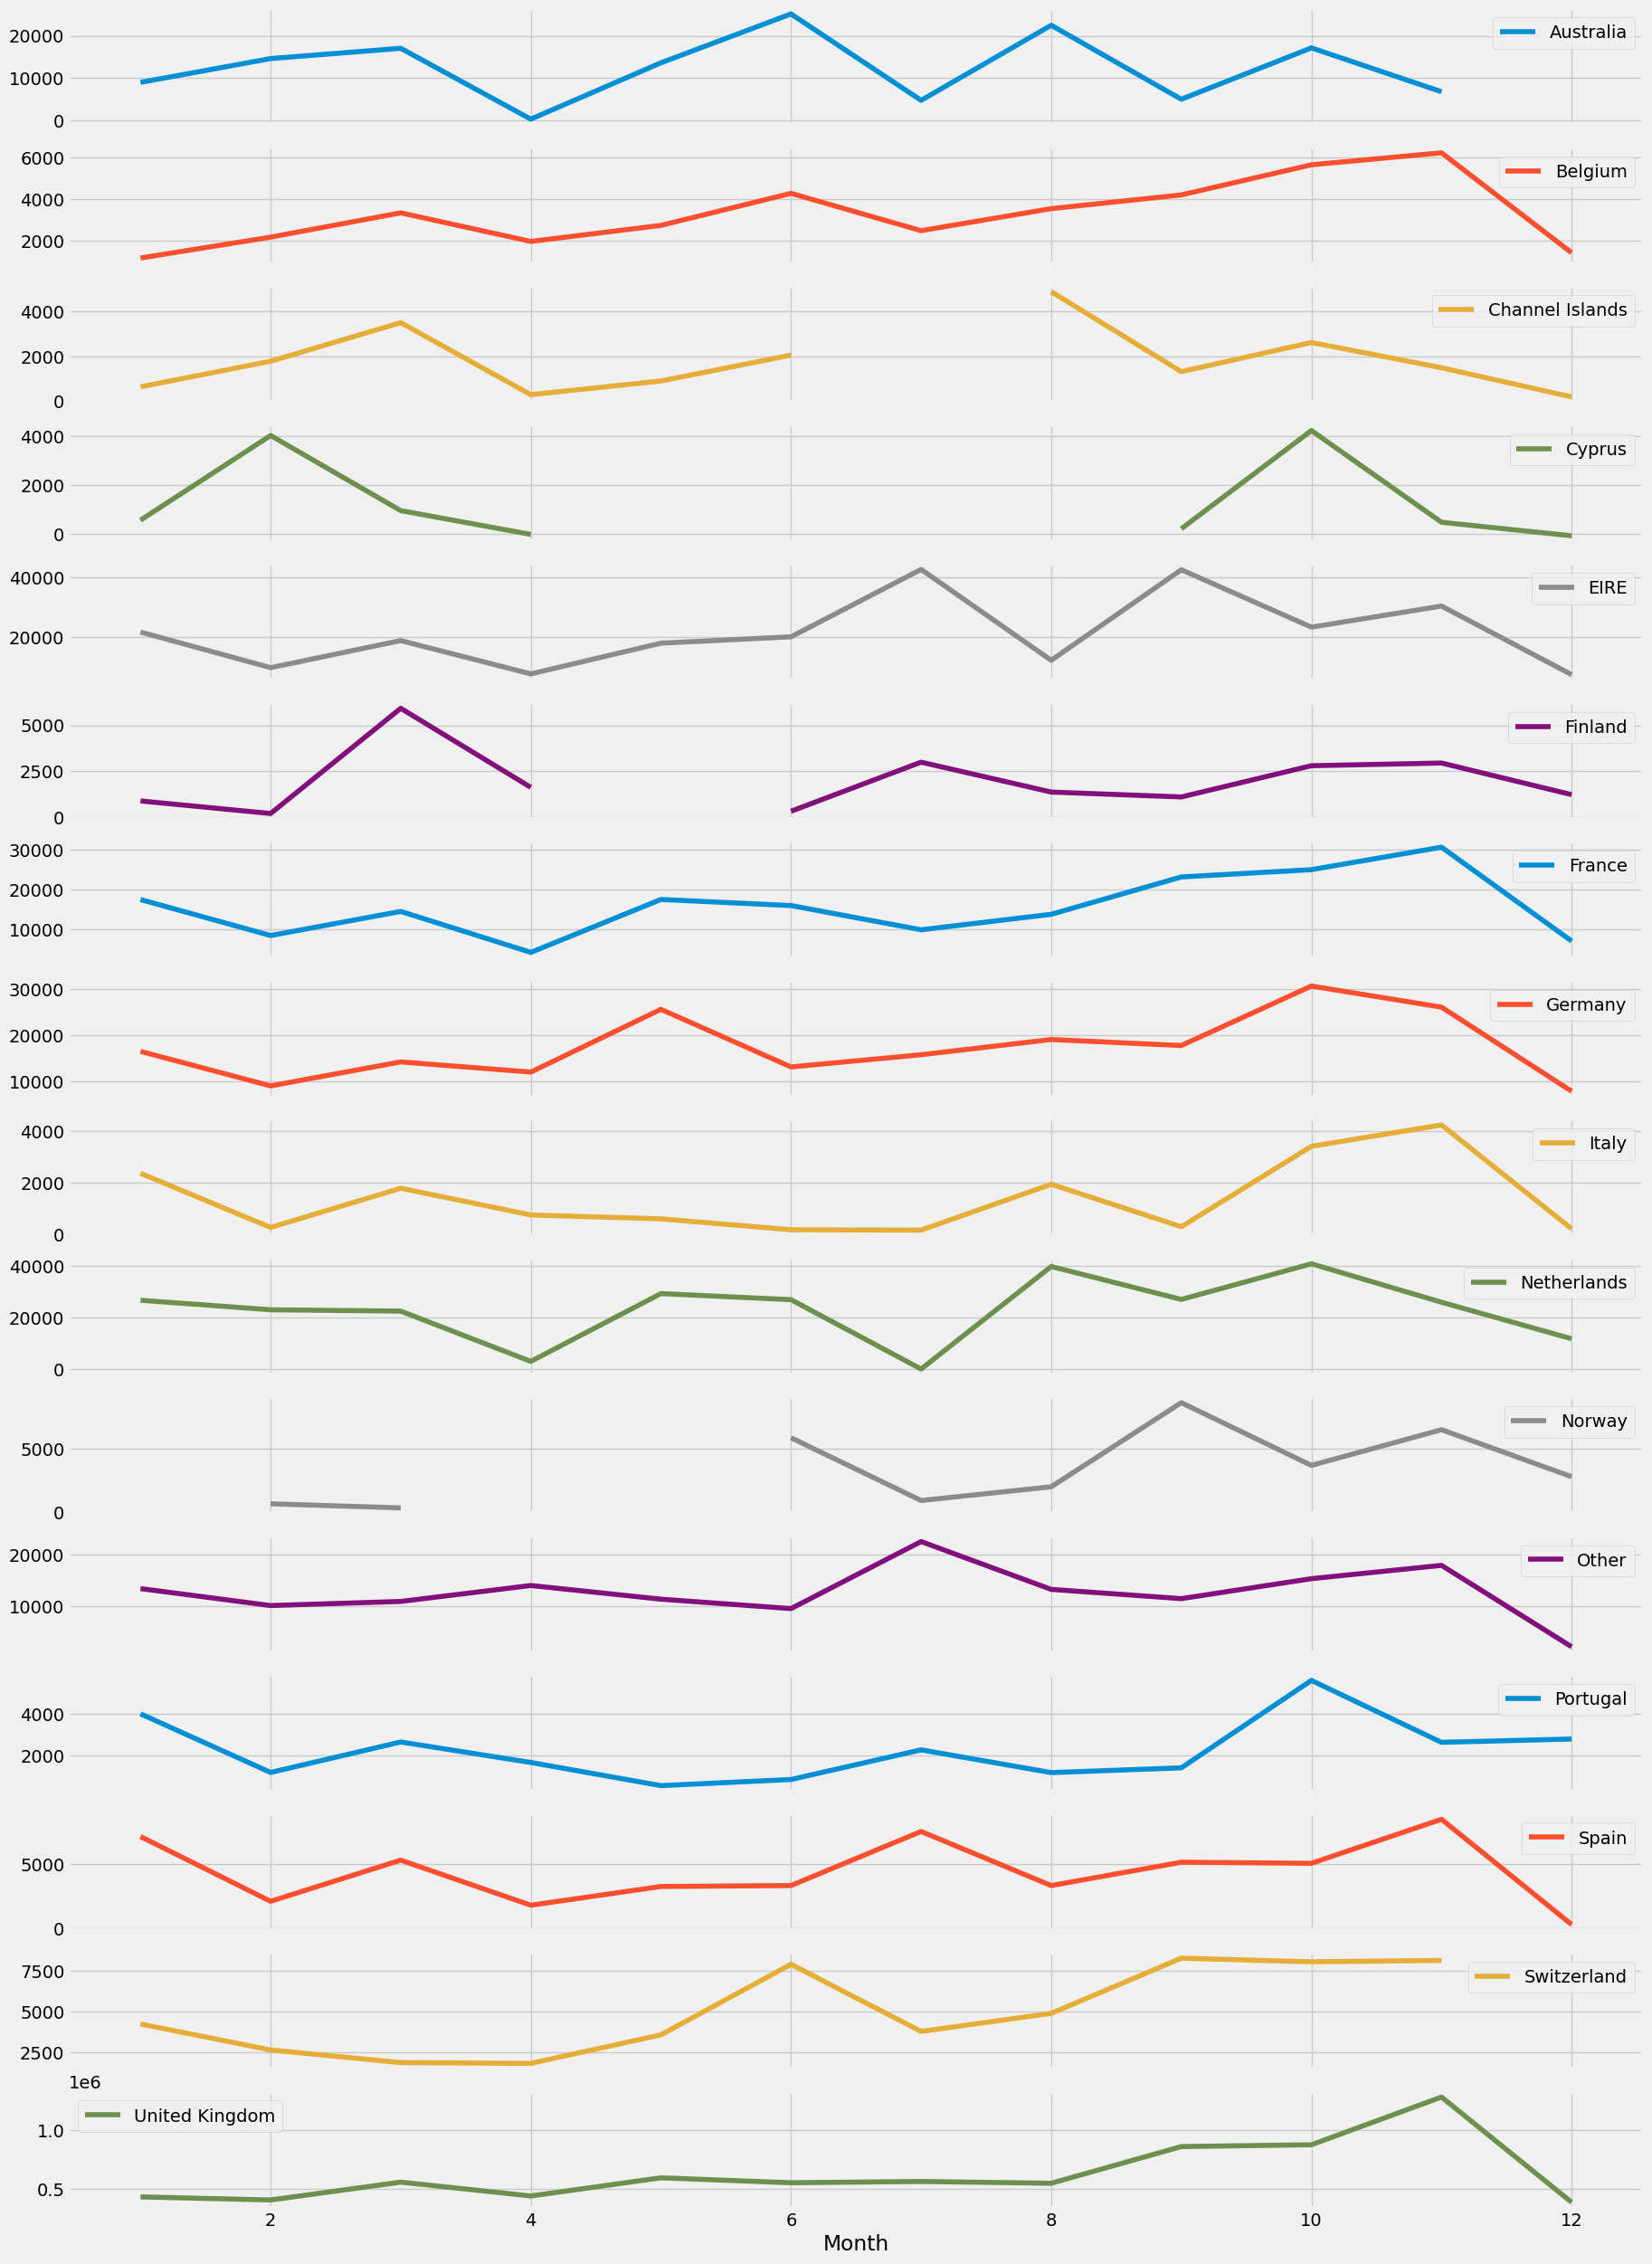

In [60]:
# sales v month v country (separate plots)
sales_country_month_flat.plot(subplots = True, figsize = (20,30))
plt.show()


## Customer Profile

In [61]:
customers = pd.DataFrame()
customers['Price_GBP'] = pd.DataFrame(df.groupby('CustomerID')['Price_GBP'].sum())
customers = customers.reset_index()
customers = customers.sort_values(by = 'Price_GBP', ascending = False)
customers


,CustomerID,Price_GBP
1663,14646,270897.14
4111,18102,228603.88
3659,17450,185453.33
1851,14911,125815.49
55,12415,123725.45
...,...,...
7620,AC574902,-8286.22
7632,AC580604,-11586.50
7471,AC540118,-16453.71
7470,AC540117,-16888.02


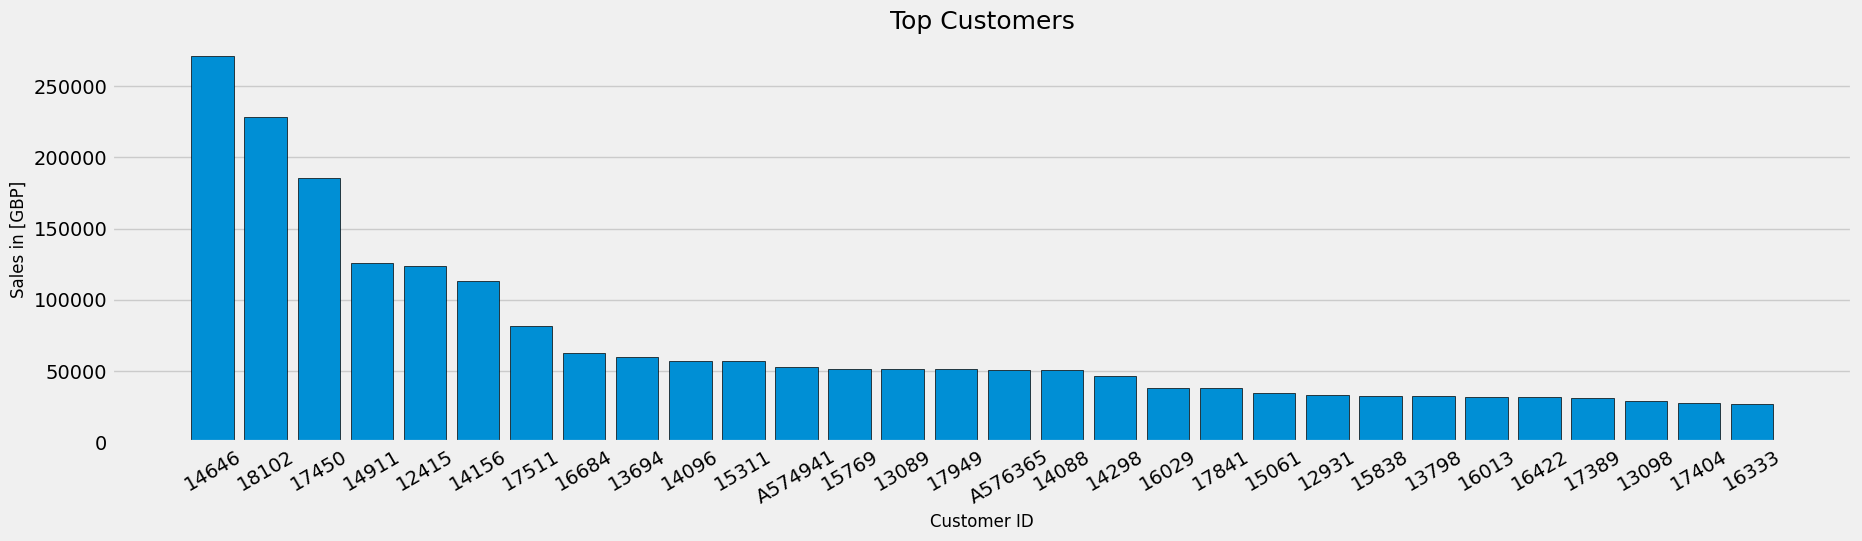

In [62]:
plt.figure(figsize = (20,5))
plt.bar(customers['CustomerID'][0:30],customers['Price_GBP'][0:30], edgecolor = 'k')
plt.xticks(rotation = 30)
plt.xlabel('Customer ID', fontsize = 12)
plt.ylabel('Sales in [GBP]', fontsize = 12)
plt.title('Top Customers', fontsize = 18)
plt.grid(axis = 'x')
plt.show()


## Product Analysis

In [63]:
stock_code = df.groupby('StockCode')[['Price_GBP']].sum().reset_index().sort_values(by = ['Price_GBP'], ascending = False)
stock_code


,StockCode,Price_GBP
3982,DOT,181574.290
1323,22423,137864.830
2696,47566,97095.240
3474,85123A,88815.540
3454,85099B,88383.680
...,...,...
3966,D,-5002.240
3963,BANK CHARGES,-6128.339
3965,CRUK,-7933.430
3983,M,-68620.280


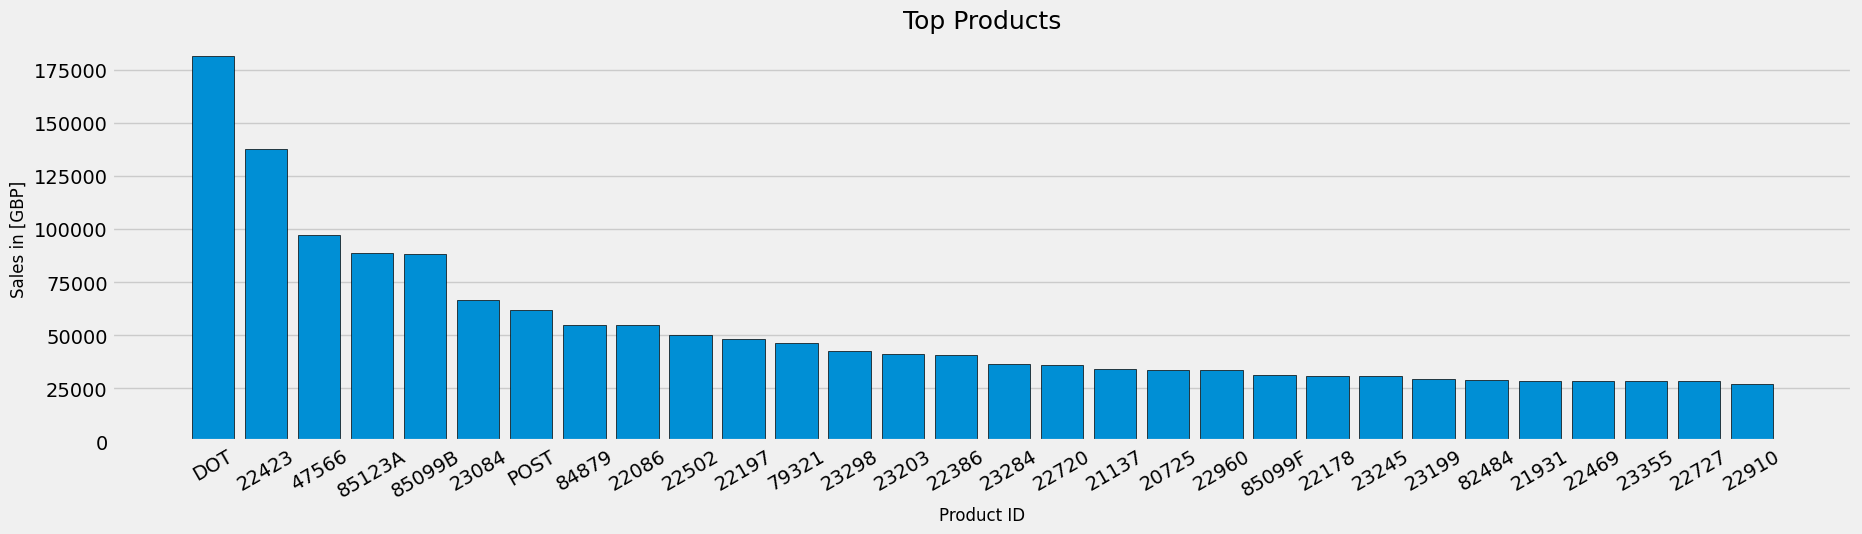

In [64]:
plt.figure(figsize = (20,5))
plt.bar(stock_code['StockCode'][0:30],stock_code['Price_GBP'][0:30], edgecolor = 'k')
plt.xticks(rotation = 30)
plt.xlabel('Product ID', fontsize = 12)
plt.ylabel('Sales in [GBP]', fontsize = 12)
plt.title('Top Products', fontsize = 18)
plt.grid(axis = 'x')
plt.show()


◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼

# Time Series Analysis

## Sales per Month

In [65]:
# sales per month
total_sales_month = df.groupby('Month')['Price_GBP'].sum().reset_index()
total_sales_month


,Month,Price_GBP
0,1,560000.260
1,2,498062.650
2,3,683267.080
3,4,493207.121
4,5,723333.510
5,6,691123.120
6,7,681300.111
7,8,693742.570
8,9,1019687.622
9,10,1070704.670


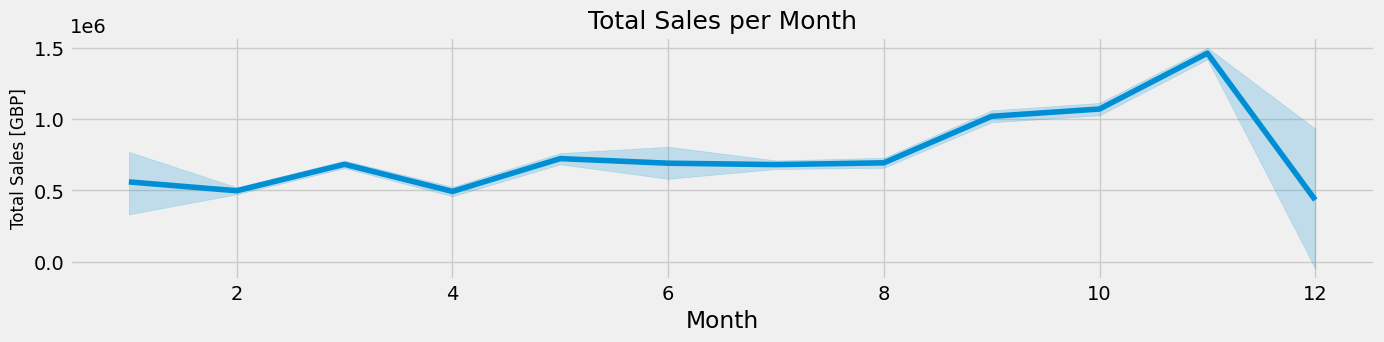

In [66]:
# visualize total sales over months
sns.lineplot(data = df, x = 'Month', y = 'Price_GBP', estimator = 'sum')
plt.ylabel('Total Sales [GBP]', fontsize = 12)
plt.title('Total Sales per Month', fontsize = 18)
plt.show()


## Sales per Day

In [68]:
# average sales per day
sales_day = df.groupby('Day').agg({'Price_GBP': ['sum', 'mean']}).reset_index()
sales_day


Day   Price_GBP           
               sum       mean
0    1  257436.330  17.849014
1    2  242487.950  16.586043
2    3  262517.650  21.355052
3    4  367045.110  18.710563
4    5  312531.660  16.127337
5    6  327010.650  16.105725
6    7  404720.820  20.200690
7    8  342395.250  15.555643
8    9  288480.770  18.910572
9   10  287074.150  16.702010
10  11  388681.410  21.104491
11  12  226824.600  17.885554
12  13  242249.650  15.152915
13  14  383424.840  23.967048
14  15  297115.711  20.717921
15  16  243417.470  17.622346
16  17  355491.710  18.054429
17  18  307933.470  16.097730
18  19  254913.180  20.136913
19  20  369831.520  21.242477
20  21  325799.260  18.450519
21  22  276983.070  17.479684
22  23  272086.530  16.155239
23  24  280461.440  16.607144
24  25  272417.331  16.782734
25  26  202768.502  19.196109
26  27  239582.040  15.948745
27  28  320351.210  18.554950
28  29  233292.940  19.563349
29  30  251110.250  16.289994
30  31  173416.500  16.487593

In [69]:
sales_day.columns


MultiIndex([(      'Day',     ''),
            ('Price_GBP',  'sum'),
            ('Price_GBP', 'mean')],
           )

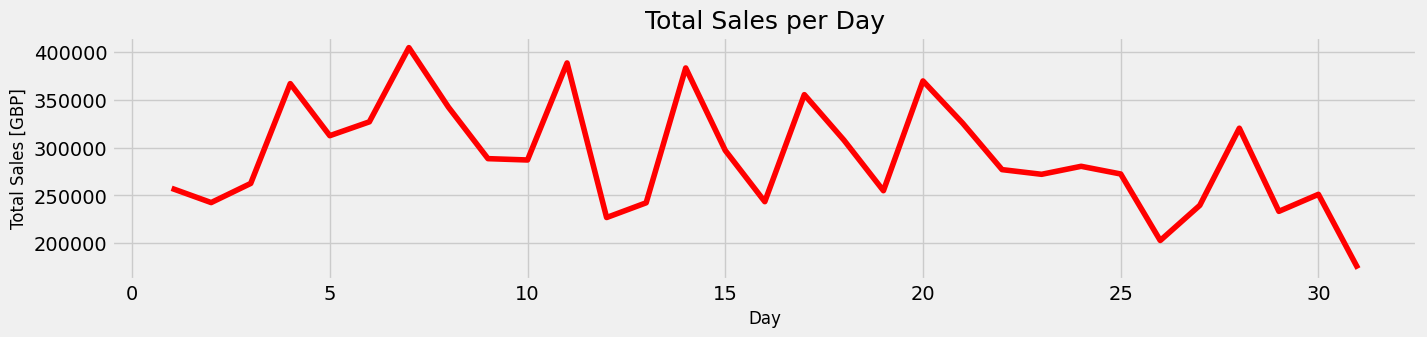

In [70]:
# visualize total sales per day of month
sns.lineplot(data = sales_day, x = ('Day', ''), y = ('Price_GBP', 'sum'), color = 'red')
plt.xlabel('Day', fontsize = 12)
plt.ylabel('Total Sales [GBP]', fontsize = 12)
plt.title('Total Sales per Day', fontsize = 18)
plt.show()


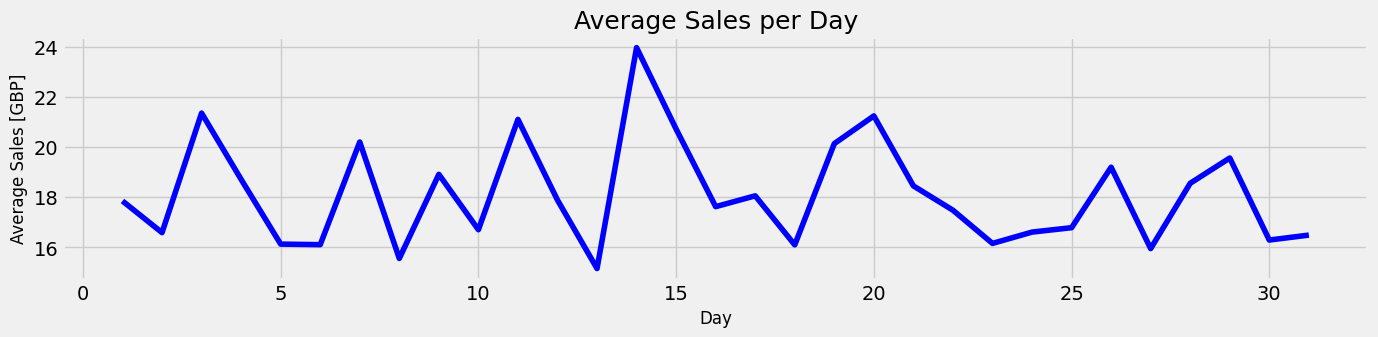

In [73]:
# visualize average sales per day of month
sns.lineplot(data = sales_day, x = ('Day', ''), y = ('Price_GBP', 'mean'), color = 'blue')
plt.xlabel('Day', fontsize = 12)
plt.ylabel('Average Sales [GBP]', fontsize = 12)
plt.title('Average Sales per Day', fontsize = 18)
plt.show()


## Sales Per Hour

In [74]:
# total sales per hour
total_sales_hour = df.groupby('Hour')[['Price_GBP']].sum().reset_index()
total_sales_hour = total_sales_hour.rename(columns = {'Price_GBP': 'Total_Sales'})
total_sales_hour


,Hour,Total_Sales
0,6,-497.350
1,7,30542.320
2,8,275697.830
3,9,706609.601
4,10,1245066.951
5,11,1063969.780
6,12,1278351.170
7,13,1092389.000
8,14,1004060.831
9,15,1066294.300


In [75]:
# average sales per hour
avg_sales_hour = df.groupby('Hour')[['Price_GBP']].mean().reset_index()
avg_sales_hour = avg_sales_hour.rename(columns = {'Price_GBP': 'Average_Sales'})
avg_sales_hour


,Hour,Average_Sales
0,6,-12.130488
1,7,81.882895
2,8,31.700337
3,9,22.366726
4,10,27.287942
5,11,20.270338
6,12,17.360882
7,13,16.345299
8,14,16.751098
9,15,14.942465


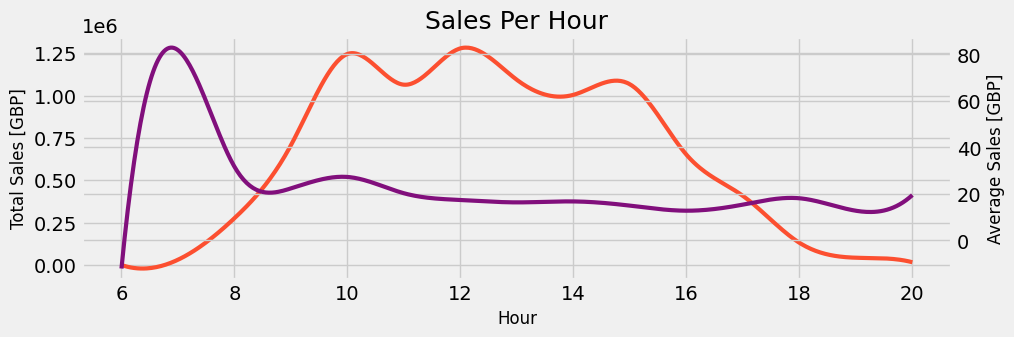

In [76]:
# sales per hour viz

plt.figure(figsize = (10,3))
x, y = total_sales_hour['Hour'], total_sales_hour['Total_Sales']
XY_Spline = make_interp_spline(x, y)
X = np.linspace(x.min(), x.max(), 500)
Y = XY_Spline(X)
plt.plot(X, Y, lw = 3, color = color_palette[1])
plt.xlabel('Hour', fontsize = 12)
plt.ylabel('Total Sales [GBP]', fontsize = 12)

plt.twinx()

x2, y2 = avg_sales_hour['Hour'], avg_sales_hour['Average_Sales']
XY2_Spline = make_interp_spline(x2, y2)
X2 = np.linspace(x2.min(), x2.max(), 500)
Y2 = XY2_Spline(X2)
plt.plot(X2, Y2, lw = 3, color = color_palette[5])
plt.ylabel('Average Sales [GBP]', fontsize = 12)

plt.title('Sales Per Hour', fontsize = 18)
plt.show()


◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼

# Time Series Forecasting

## Prophet Model

In [115]:
sales_time_forecast = df.drop(columns = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice_GBP', 'CustomerID', 'Country'])
sales_time_forecast.head()


,InvoiceDate,Price_GBP,Quarter,Month,MonthName,DayName,Day,Hour,Minute
0,2011-01-04 10:00:00,19.5,1,1,January,Tuesday,4,10,0
1,2011-01-04 10:00:00,10.5,1,1,January,Tuesday,4,10,0
2,2011-01-04 10:00:00,10.5,1,1,January,Tuesday,4,10,0
3,2011-01-04 10:00:00,10.5,1,1,January,Tuesday,4,10,0
4,2011-01-04 10:00:00,12.5,1,1,January,Tuesday,4,10,0


In [116]:
sales_time_forecast['InvoiceDate'] = sales_time_forecast['InvoiceDate'].dt.date
sales_time_forecast['InvoiceDate'] = pd.to_datetime(sales_time_forecast['InvoiceDate'])
sales_time_forecast['InvoiceDate'].dtype


dtype('<M8[ns]')

In [117]:
sales_time_forecast = sales_time_forecast.groupby('InvoiceDate')[['Price_GBP']].sum().reset_index()
sales_time_forecast


,InvoiceDate,Price_GBP
0,2011-01-04,14950.48
1,2011-01-05,-1566.23
2,2011-01-06,37392.74
3,2011-01-07,27233.14
4,2011-01-09,15710.80
...,...,...
280,2011-12-05,57751.32
281,2011-12-06,54228.37
282,2011-12-07,75076.22
283,2011-12-08,81417.78


In [118]:
train = sales_time_forecast.loc[sales_time_forecast['InvoiceDate'] <  '2011-10-01']
test  = sales_time_forecast.loc[sales_time_forecast['InvoiceDate'] >= '2011-10-01']


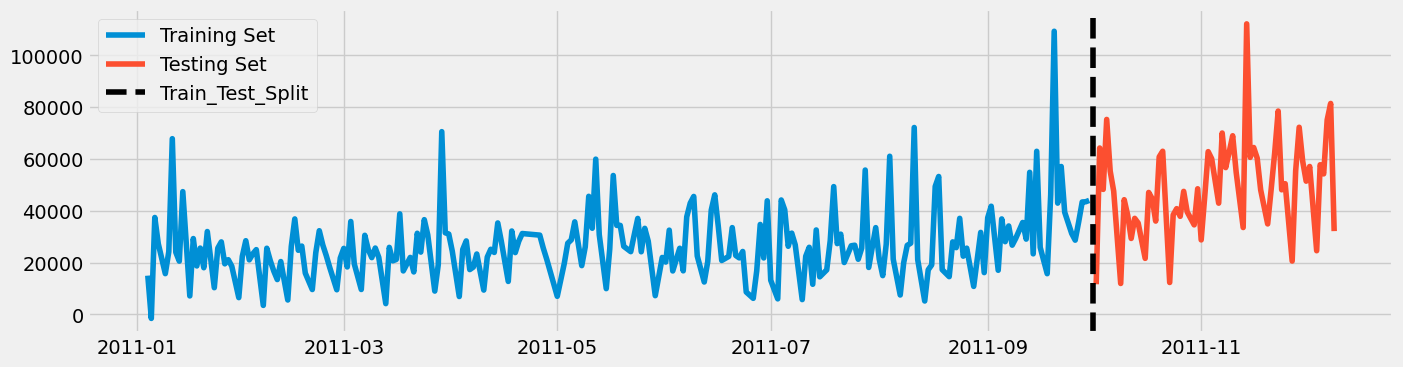

In [119]:
plt.figure(figsize = (15,4))
plt.plot(train['InvoiceDate'], train['Price_GBP'], color = color_palette[0], label = 'Training Set')
plt.plot(test['InvoiceDate'], test['Price_GBP'], color = color_palette[1], label = 'Testing Set')
plt.axvline(datetime(2011, 10, 1), label = 'Train_Test_Split', color = 'black', ls = '--')
plt.legend()
plt.show()


In [126]:
train = train.rename(columns = {'InvoiceDate': 'ds', 'Price_GBP': 'y'})
test = test.rename(columns = {'InvoiceDate': 'ds', 'Price_GBP': 'y'})


In [127]:
prophet_model = Prophet(yearly_seasonality = True, daily_seasonality = True)
prophet_model.fit(train)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpbjn_wsdz/9vjfwo3c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbjn_wsdz/9pgq3ka6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62927', 'data', 'file=/tmp/tmpbjn_wsdz/9vjfwo3c.json', 'init=/tmp/tmpbjn_wsdz/9pgq3ka6.json', 'output', 'file=/tmp/tmpbjn_wsdz/prophet_modeldusellux/prophet_model-20240825111845.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:18:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:18:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



<Figure size 2000x300 with 0 Axes>

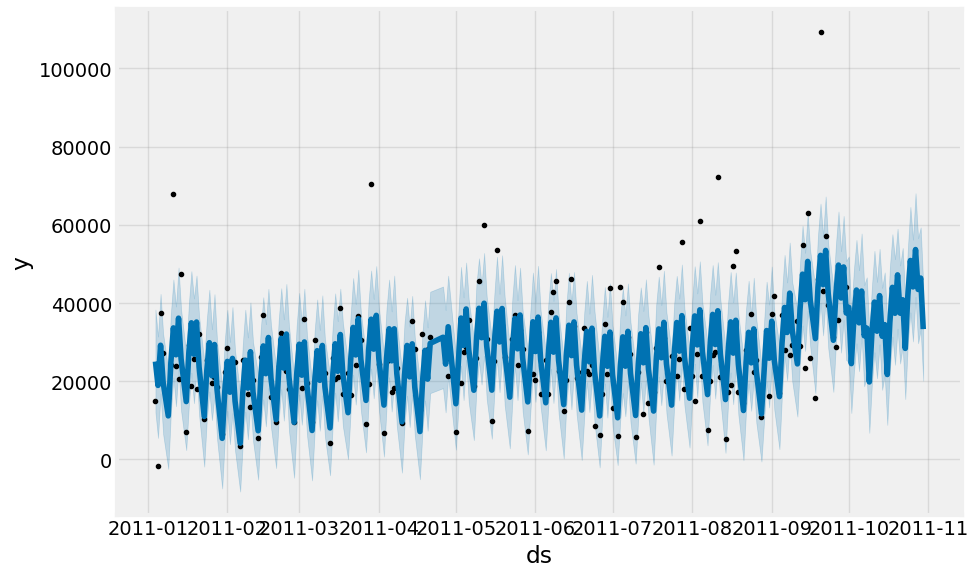

In [130]:
future = prophet_model.make_future_dataframe(periods=30)
forecast = prophet_model.predict(future)

# visualize the forecast
plt.figure(figsize = (20,3))
prophet_model.plot(forecast)
plt.show()


In [88]:
test_fcst = prophet_model.predict(test)
test_fcst


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-10-02,33458.940961,6741.549274,33664.836970,33458.940961,33458.940961,-12771.865230,-12771.865230,-12771.865230,-12771.865230,-12771.865230,-12771.865230,0.0,0.0,0.0,20687.075731
1,2011-10-03,33519.309004,18873.799320,48356.893803,33519.288242,33519.344581,-100.434324,-100.434324,-100.434324,-100.434324,-100.434324,-100.434324,0.0,0.0,0.0,33418.874680
2,2011-10-04,33579.677046,27298.139379,55294.219467,33579.336701,33580.021324,7748.778795,7748.778795,7748.778795,7748.778795,7748.778795,7748.778795,0.0,0.0,0.0,41328.455841
3,2011-10-05,33640.045088,19061.794477,47098.053546,33639.182760,33640.709000,208.358181,208.358181,208.358181,208.358181,208.358181,208.358181,0.0,0.0,0.0,33848.403269
4,2011-10-06,33700.413131,28937.295758,55827.479375,33698.990647,33701.727654,9071.697477,9071.697477,9071.697477,9071.697477,9071.697477,9071.697477,0.0,0.0,0.0,42772.110608
5,2011-10-07,33760.781173,17403.712170,45294.299011,33758.670414,33762.556757,-1645.286998,-1645.286998,-1645.286998,-1645.286998,-1645.286998,-1645.286998,0.0,0.0,0.0,32115.494175
6,2011-10-09,33881.517258,7673.417743,34191.208482,33878.558225,33883.882764,-12771.865230,-12771.865230,-12771.865230,-12771.865230,-12771.865230,-12771.865230,0.0,0.0,0.0,21109.652028
7,2011-10-10,33941.885301,19762.316489,48039.613510,33938.096612,33944.926307,-100.434324,-100.434324,-100.434324,-100.434324,-100.434324,-100.434324,0.0,0.0,0.0,33841.450977
8,2011-10-11,34002.253343,27457.990271,54509.173105,33997.401408,34006.038528,7748.778795,7748.778795,7748.778795,7748.778795,7748.778795,7748.778795,0.0,0.0,0.0,41751.032138
9,2011-10-12,34062.621385,20045.574450,48088.085493,34056.835099,34067.187729,208.358181,208.358181,208.358181,208.358181,208.358181,208.358181,0.0,0.0,0.0,34270.979566


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



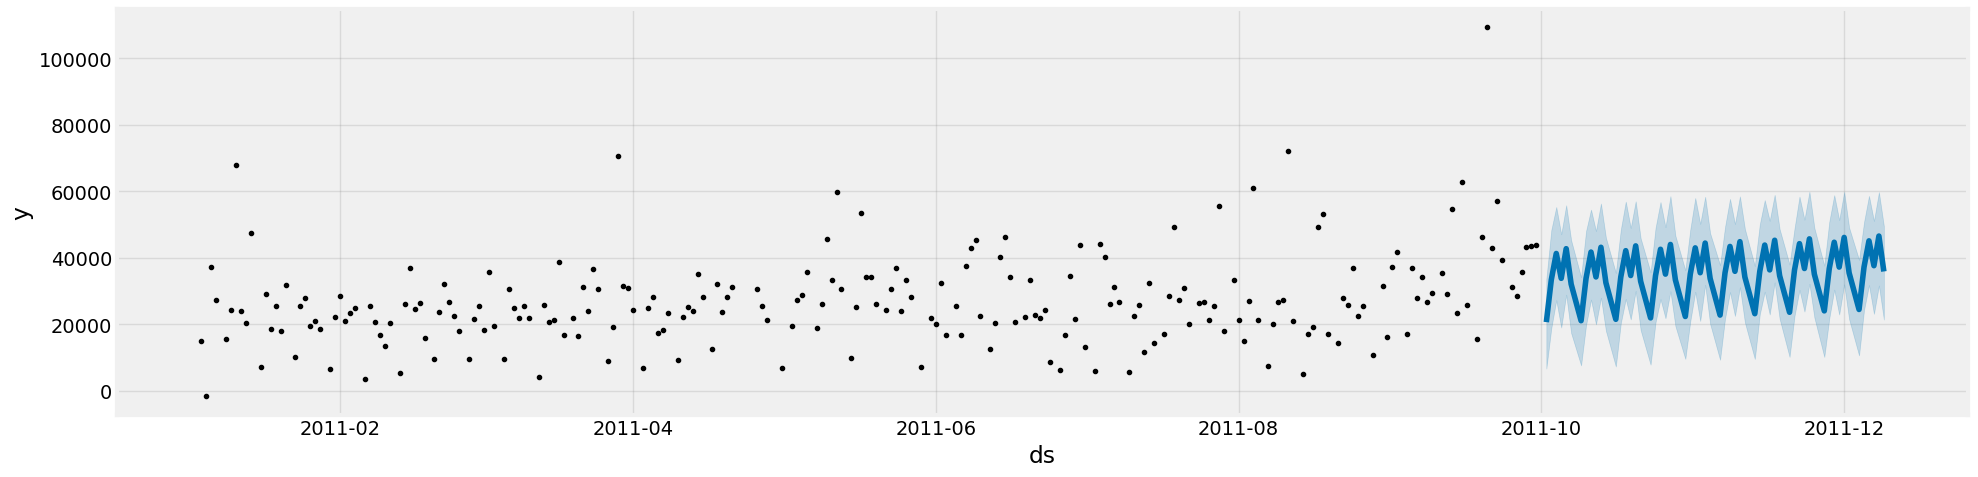

In [89]:
prophet_model.plot(test_fcst, figsize = (20,5))
plt.show()


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



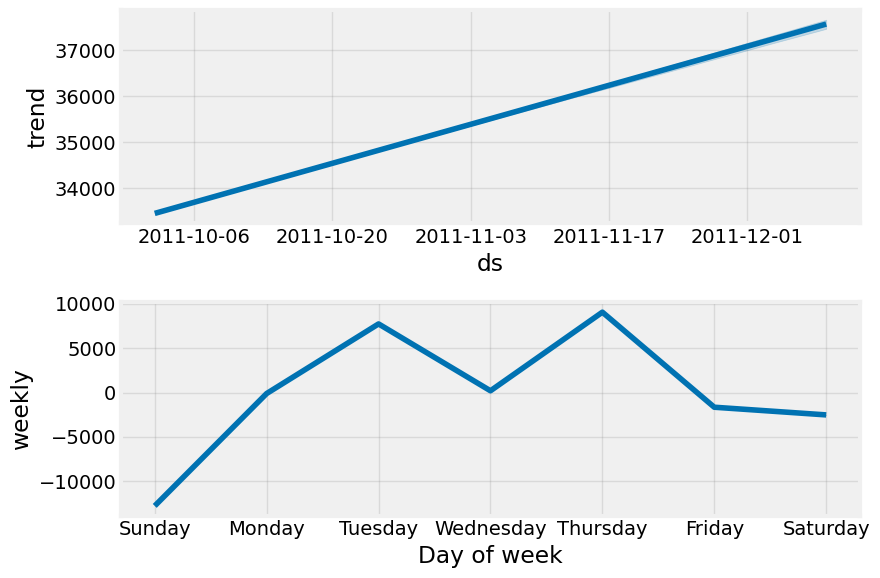

In [90]:
prophet_model.plot_components(test_fcst)
plt.show()


In [91]:
df1 = test_fcst.loc[:,['ds', 'yhat']]
df1.head()


,ds,yhat
0,2011-10-02,20687.075731
1,2011-10-03,33418.874680
2,2011-10-04,41328.455841
3,2011-10-05,33848.403269
4,2011-10-06,42772.110608


In [92]:
df2 = pd.merge(test, df1, how = 'inner', on = 'ds')
df2.head()


,ds,y,yhat
0,2011-10-02,11623.58,20687.075731
1,2011-10-03,64214.78,33418.874680
2,2011-10-04,48240.84,41328.455841
3,2011-10-05,75244.43,33848.403269
4,2011-10-06,55306.28,42772.110608


In [93]:
df3 = pd.merge(train, df2, how = 'outer')
df3


,ds,y,yhat
0,2011-01-04,14950.48,NaN
1,2011-01-05,-1566.23,NaN
2,2011-01-06,37392.74,NaN
3,2011-01-07,27233.14,NaN
4,2011-01-09,15710.80,NaN
...,...,...,...
280,2011-12-05,57751.32,37222.061352
281,2011-12-06,54228.37,45131.642513
282,2011-12-07,75076.22,37651.589942
283,2011-12-08,81417.78,46575.297281


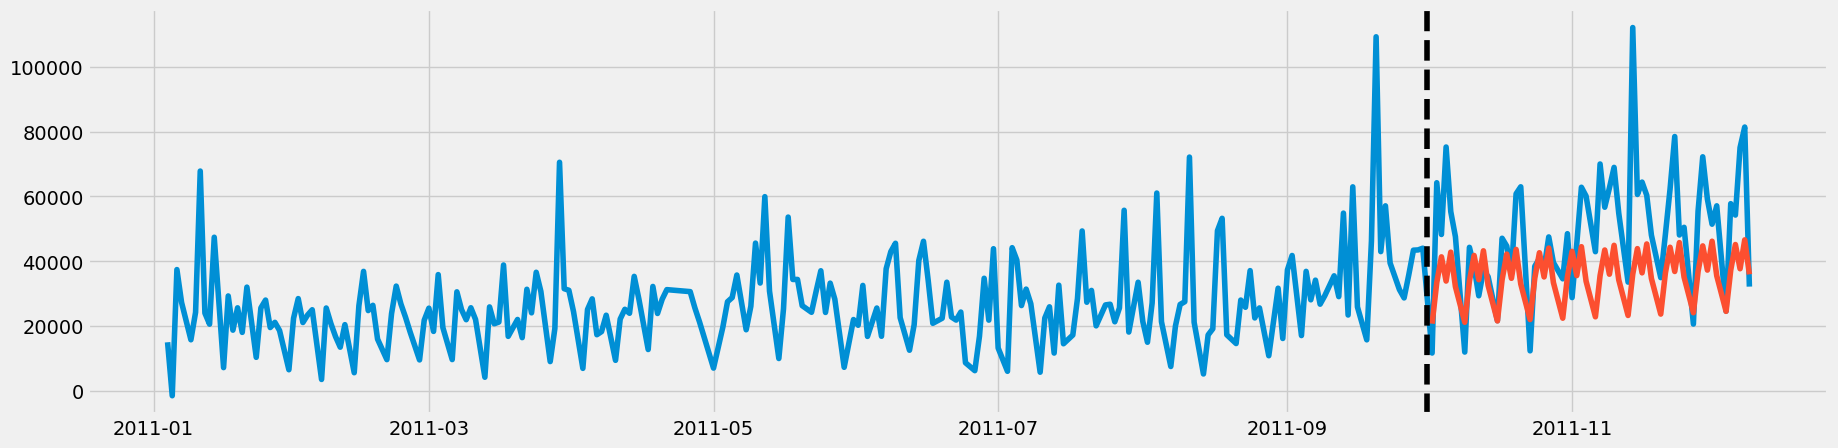

In [94]:
plt.figure(figsize = (20,5))
plt.plot(df3['ds'], df3['y'], color = color_palette[0])
plt.plot(df3['ds'], df3['yhat'] , color = color_palette[1])
plt.axvline(datetime(2011, 10, 1), color = 'black', ls = '--')
plt.show()




---



In [95]:
sales_time_hourly_forecast = df.drop(columns = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice_GBP', 'CustomerID', 'Country'])
sales_time_hourly_forecast.head()


,InvoiceDate,Price_GBP,Quarter,Month,MonthName,DayName,Day,Hour,Minute
0,2011-01-04 10:00:00,19.5,1,1,January,Tuesday,4,10,0
1,2011-01-04 10:00:00,10.5,1,1,January,Tuesday,4,10,0
2,2011-01-04 10:00:00,10.5,1,1,January,Tuesday,4,10,0
3,2011-01-04 10:00:00,10.5,1,1,January,Tuesday,4,10,0
4,2011-01-04 10:00:00,12.5,1,1,January,Tuesday,4,10,0


In [96]:
sales_time_hourly_forecast = sales_time_hourly_forecast.groupby('InvoiceDate')[['Price_GBP']].sum().reset_index()
sales_time_hourly_forecast.head()


,InvoiceDate,Price_GBP
0,2011-01-04 10:00:00,307.3
1,2011-01-04 10:09:00,0.0
2,2011-01-04 10:12:00,0.0
3,2011-01-04 10:15:00,0.0
4,2011-01-04 10:16:00,0.0


In [97]:
train = sales_time_hourly_forecast.loc[sales_time_hourly_forecast['InvoiceDate'] <  '2011-10-01']
test  = sales_time_hourly_forecast.loc[sales_time_hourly_forecast['InvoiceDate'] >= '2011-10-01']


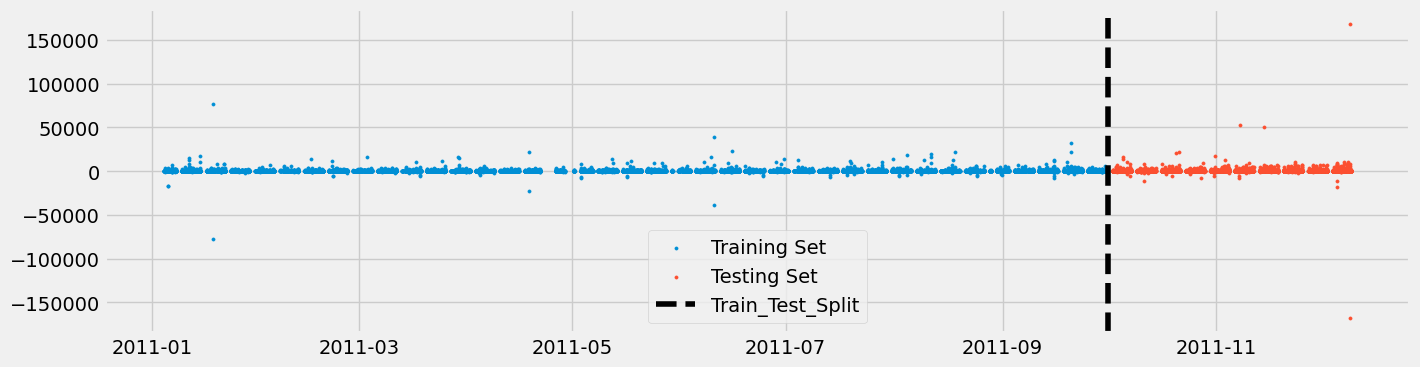

In [98]:
plt.figure(figsize = (15,4))
plt.scatter(train['InvoiceDate'], train['Price_GBP'], color = color_palette[0], s = 5, label = 'Training Set')
plt.scatter(test['InvoiceDate'], test['Price_GBP'], color = color_palette[1], s = 5, label = 'Testing Set')
plt.axvline(datetime(2011, 10, 1), label = 'Train_Test_Split', color = 'black', ls = '--')
plt.legend()
plt.show()


In [99]:
train = train.rename(columns = {'InvoiceDate': 'ds', 'Price_GBP': 'y'})
test = test.rename(columns = {'InvoiceDate': 'ds', 'Price_GBP': 'y'})


In [100]:
prophet_model = Prophet()
prophet_model.fit(train)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbjn_wsdz/n9revnd6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbjn_wsdz/c0f_r5g3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69838', 'data', 'file=/tmp/tmpbjn_wsdz/n9revnd6.json', 'init=/tmp/tmpbjn_wsdz/c0f_r5g3.json', 'output', 'file=/tmp/tmpbjn_wsdz/prophet_modeltxuskktk/prophet_model-20240825101119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:11:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:11:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [101]:
test_fcst = prophet_model.predict(test)
test_fcst


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-10-02 10:32:00,59.452188,-1425.187291,2313.202570,59.452188,59.452188,440.336389,440.336389,440.336389,466.101354,466.101354,466.101354,-25.764965,-25.764965,-25.764965,0.0,0.0,0.0,499.788576
1,2011-10-02 10:43:00,59.460468,-1356.474825,2346.947510,59.460468,59.460468,431.785482,431.785482,431.785482,457.721115,457.721115,457.721115,-25.935633,-25.935633,-25.935633,0.0,0.0,0.0,491.245951
2,2011-10-02 10:55:00,59.469502,-1479.581820,2370.411913,59.469502,59.469502,422.857395,422.857395,422.857395,448.984984,448.984984,448.984984,-26.127589,-26.127589,-26.127589,0.0,0.0,0.0,482.326897
3,2011-10-02 10:58:00,59.471760,-1473.990816,2412.909074,59.471760,59.471760,420.697744,420.697744,420.697744,446.874233,446.874233,446.874233,-26.176489,-26.176489,-26.176489,0.0,0.0,0.0,480.169505
4,2011-10-02 11:04:00,59.476277,-1359.351698,2303.460329,59.476277,59.476277,416.471009,416.471009,416.471009,442.746359,442.746359,442.746359,-26.275351,-26.275351,-26.275351,0.0,0.0,0.0,475.947286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6281,2011-12-09 12:23:00,133.250222,-1220.994876,2482.163506,62.000280,212.194549,377.022562,377.022562,377.022562,402.718361,402.718361,402.718361,-25.695799,-25.695799,-25.695799,0.0,0.0,0.0,510.272784
6282,2011-12-09 12:25:00,133.251728,-1381.995867,2458.668691,61.989530,212.207197,376.236481,376.236481,376.236481,402.122450,402.122450,402.122450,-25.885969,-25.885969,-25.885969,0.0,0.0,0.0,509.488209
6283,2011-12-09 12:31:00,133.256245,-1385.225387,2483.834911,61.981791,212.222856,374.025566,374.025566,374.025566,400.481233,400.481233,400.481233,-26.455667,-26.455667,-26.455667,0.0,0.0,0.0,507.281810
6284,2011-12-09 12:49:00,133.269795,-1277.525387,2333.421853,61.983086,212.247550,368.766071,368.766071,368.766071,396.923092,396.923092,396.923092,-28.157021,-28.157021,-28.157021,0.0,0.0,0.0,502.035867


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



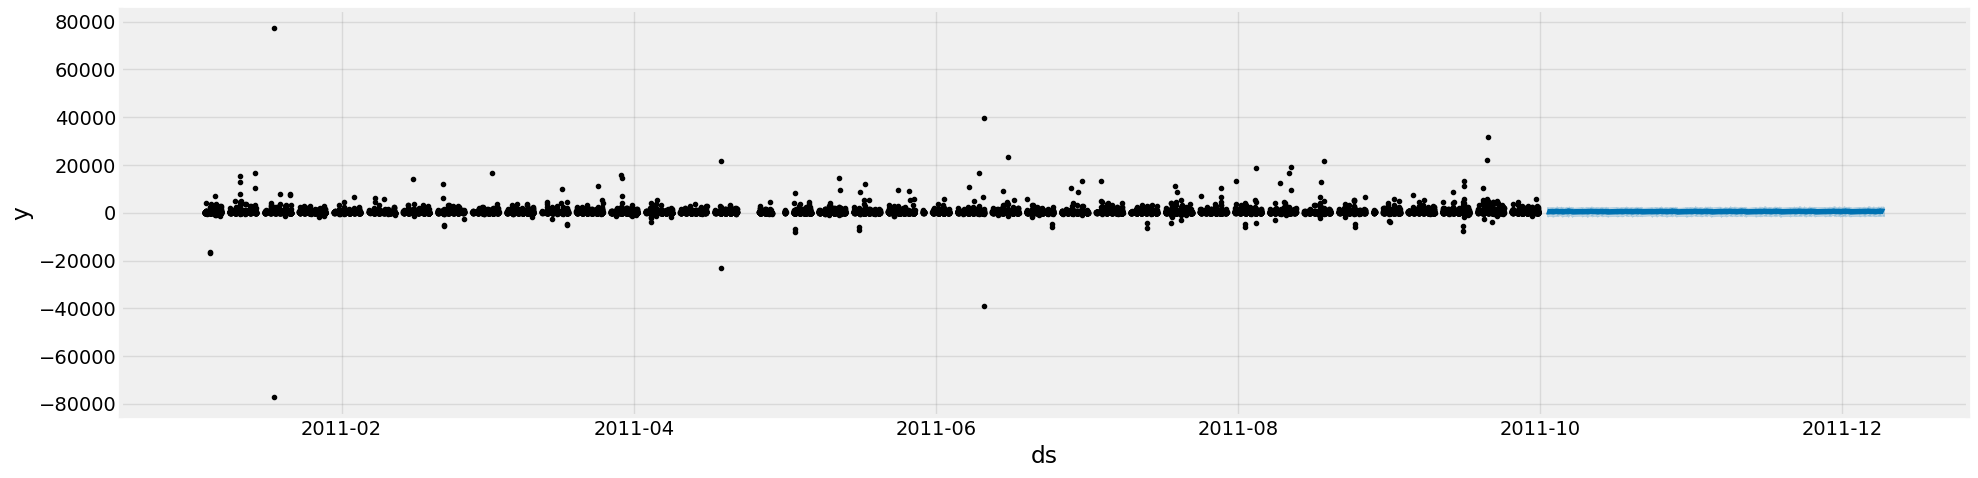

In [102]:
prophet_model.plot(test_fcst, figsize = (20,5))
plt.show()


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:397: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:401: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:397: FutureWarning:

The behavio

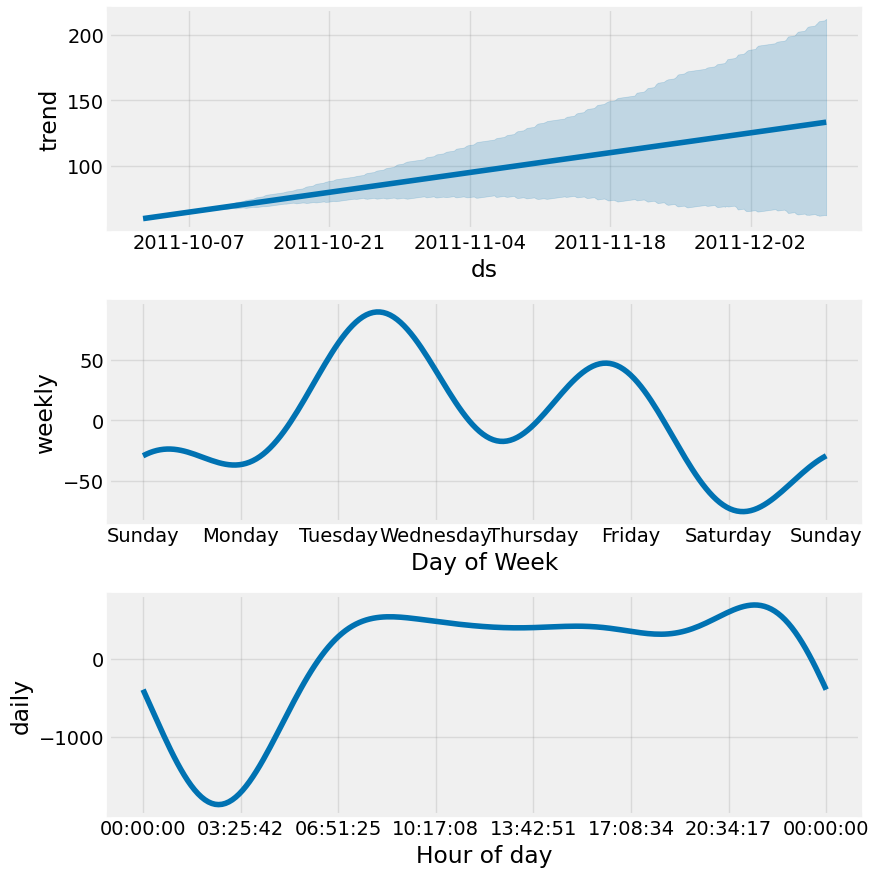

In [103]:
prophet_model.plot_components(test_fcst)
plt.show()




---

**End of Project**